In [1]:
!pip install tensorflow==2.12.0
!pip install scikit-learn


In [2]:
!pip install opencv-python
!pip install mediapipe --upgrade
!pip install matplotlib

2.Keypoints using MP heulistics

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, holistic):
    # Convert image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Set image to non-writeable
    image.flags.writeable = False
    
    # Make prediction
    results = holistic.process(image)
    
    # Set image to writeable
    image.flags.writeable = True
    
    # Convert image back to BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections


In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )


In [6]:
# Initialize VideoCapture
cap = cv2.VideoCapture(0)

# Initialize MediaPipe holistic model
with mp.solutions.holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()
        if not ret:
            break

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Release the VideoCapture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [444]:
draw_landmarks(frame, results)

AttributeError: module 'mediapipe.python.solutions.holistic' has no attribute 'FACE_CONNECTIONS'

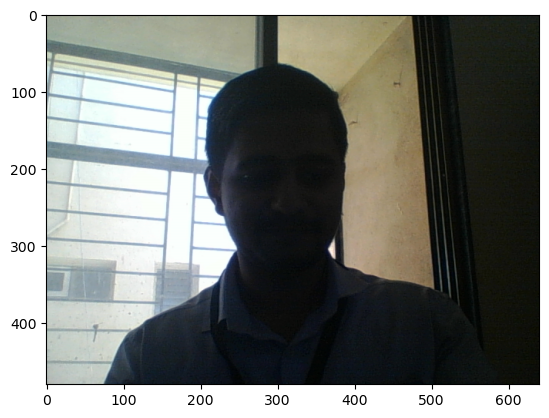

In [7]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

3.Extract keypoints value 

In [8]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [9]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [10]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
print(results.face_landmarks)

landmark {
  x: 0.49644873
  y: 0.5764102
  z: -0.023781748
}
landmark {
  x: 0.49877435
  y: 0.53185576
  z: -0.0565959
}
landmark {
  x: 0.49644575
  y: 0.5434493
  z: -0.028652428
}
landmark {
  x: 0.48662212
  y: 0.48097363
  z: -0.046390723
}
landmark {
  x: 0.4986391
  y: 0.5168794
  z: -0.06104794
}
landmark {
  x: 0.49734586
  y: 0.49594614
  z: -0.058060788
}
landmark {
  x: 0.4933567
  y: 0.44481862
  z: -0.032551274
}
landmark {
  x: 0.41356924
  y: 0.44596913
  z: 0.0026079183
}
landmark {
  x: 0.4914699
  y: 0.40824664
  z: -0.026603
}
landmark {
  x: 0.49102873
  y: 0.3883841
  z: -0.029525254
}
landmark {
  x: 0.4873948
  y: 0.3208296
  z: -0.022947086
}
landmark {
  x: 0.49637845
  y: 0.5825731
  z: -0.021529889
}
landmark {
  x: 0.49601194
  y: 0.5858948
  z: -0.017789328
}
landmark {
  x: 0.4956294
  y: 0.58582366
  z: -0.013039594
}
landmark {
  x: 0.495928
  y: 0.5854379
  z: -0.01191377
}
landmark {
  x: 0.49624655
  y: 0.5892944
  z: -0.013709232
}
landmark {
  x:

In [11]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [12]:
result_test = extract_keypoints(results)

In [13]:
result_test

array([ 0.50878835,  0.51957762, -1.69227409, ...,  0.        ,
        0.        ,  0.        ])

In [14]:
np.save('0', result_test)

In [15]:
np.load('0.npy')

array([ 0.50878835,  0.51957762, -1.69227409, ...,  0.        ,
        0.        ,  0.        ])

4.Setup folders for collection

In [16]:
actions = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I','J', 'K', 'L', 'M', 'N', 'O', 'P','Q', 'R', 'S','T', 'U', 'V', 'W', 'X', 'Y', 'Z'])


In [21]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Actions that we try to detect
actions = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I','J', 'K', 'L', 'M', 'N', 'O', 'P','Q', 'R', 'S','T', 'U', 'V', 'W', 'X', 'Y', 'Z'])

# Create the directory if it doesn't exist
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 1

for action in actions:
    dirmax = 0
    try:
        dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    except ValueError:
        # Handle the case where the directory is empty
        pass
    except FileNotFoundError:
        # Handle the case where the directory doesn't exist
        pass
    
    for sequence in range(1, no_sequences + 1):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax + sequence)))
        except FileExistsError:
            # Handle the case where the directory already exists
            pass


In [29]:
for action in actions: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'MP_Data\\0'

Collect keypoints and values for training and testing

In [39]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(1, 31):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

In [40]:
cap.release()
cv2.destroyAllWindows()

Preprocess data and create labels and features

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [23]:
label_map = {label:num for num, label in enumerate(actions)}

In [24]:
label_map

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [27]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [28]:
np.array(sequences).shape

(780, 30, 1662)

In [29]:
np.array(labels).shape

(780,)

In [30]:
X = np.array(sequences)

In [31]:
X.shape

(780, 30, 1662)

In [32]:
y = to_categorical(labels).astype(int)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(741, 30, 1662)
(39, 30, 1662)
(741, 26)
(39, 26)


In [112]:
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

print("Train and test datasets saved successfully.")

Train and test datasets saved successfully.


Build and Train LSTM neural network

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard

In [29]:
log_dir = os.path.join('Logs')
os.makedirs(log_dir, exist_ok=True)  # This line creates the directory if it doesn't exist
tb_callback = TensorBoard(log_dir=log_dir)

In [30]:
# Define the input shape
num_features = 1662
input_shape = (sequence_length, num_features)  # You need to define num_features based on your data

# Define the number of classes
num_classes = len(actions)
# Create the sequential model
model = Sequential()

# Define the input shape
sequence_length =  30 # Define your sequence length based on your data

# Add the first LSTM layer with dropout
model.add(LSTM(units=64, return_sequences=True, input_shape=input_shape))
model.add(Dropout(0.2))

# Add the second LSTM layer with dropout
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))

# Add the third LSTM layer with dropout
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))

# Add a Dense layer with relu activation
model.add(Dense(64, activation='relu'))

# Add another Dense layer with relu activation
model.add(Dense(32, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(num_classes, activation='softmax'))


In [90]:
res = (0, 0.9, 0.1, 0.1, 0.2, 0.3, .4, .5, .7, .8, .8, .9, 1, .1, .2, .3, .4, .5, .6, .6, .7, .7, .8)

In [91]:
actions[np.argmax(res)]

'M'

In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
model.fit(X_train, y_train, epochs=500, callbacks=[tb_callback])

Epoch 1/500
24/24 [==============================] - 19s 158ms/step - loss: 3.2624 - accuracy: 0.0378
Epoch 2/500
24/24 [==============================] - 4s 152ms/step - loss: 3.2641 - accuracy: 0.0337
Epoch 3/500
24/24 [==============================] - 4s 155ms/step - loss: 3.2592 - accuracy: 0.0432
Epoch 4/500
24/24 [==============================] - 4s 152ms/step - loss: 3.2503 - accuracy: 0.0499
Epoch 5/500
24/24 [==============================] - 4s 155ms/step - loss: 3.1574 - accuracy: 0.0756
Epoch 6/500
24/24 [==============================] - 4s 155ms/step - loss: 2.9545 - accuracy: 0.0715
Epoch 7/500
24/24 [==============================] - 4s 156ms/step - loss: 2.7849 - accuracy: 0.0837
Epoch 8/500
24/24 [==============================] - 4s 153ms/step - loss: 2.6129 - accuracy: 0.0985
Epoch 9/500
24/24 [==============================] - 4s 156ms/step - loss: 2.4450 - accuracy: 0.1430
Epoch 10/500
24/24 [==============================] - 4s 154ms/step - loss: 2.1950 - accur

24/24 [==============================] - 3s 145ms/step - loss: 0.2884 - accuracy: 0.9150
Epoch 161/500
24/24 [==============================] - 3s 144ms/step - loss: 0.4545 - accuracy: 0.8556
Epoch 162/500
24/24 [==============================] - 3s 143ms/step - loss: 0.7833 - accuracy: 0.7436
Epoch 163/500
24/24 [==============================] - 3s 145ms/step - loss: 0.4132 - accuracy: 0.8516
Epoch 164/500
24/24 [==============================] - 4s 154ms/step - loss: 0.2571 - accuracy: 0.9096
Epoch 165/500
24/24 [==============================] - 4s 152ms/step - loss: 0.2118 - accuracy: 0.9312
Epoch 166/500
24/24 [==============================] - 4s 146ms/step - loss: 0.1886 - accuracy: 0.9447
Epoch 167/500
24/24 [==============================] - 4s 149ms/step - loss: 0.1953 - accuracy: 0.9447
Epoch 168/500
24/24 [==============================] - 4s 147ms/step - loss: 0.3530 - accuracy: 0.8596
Epoch 169/500
24/24 [==============================] - 3s 144ms/step - loss: 0.2660 - a

KeyboardInterrupt: 

In [92]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 dropout (Dropout)           (None, 30, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 dropout_1 (Dropout)         (None, 30, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4

Make prediction

In [93]:
res = model.predict(X_test)

2/2 [==============================] - 0s 30ms/step


In [94]:
actions[np.argmax(res[2])]

'W'

In [95]:
actions[np.argmax(y_test[2])]

'W'

Save weights

In [96]:
model.save('UniTalkLSTM.h5')

In [90]:
del model

In [97]:
model.load_weights('UniTalkLSTM.h5')

evaluation

In [98]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [99]:
yhat = model.predict(X_train)

24/24 [==============================] - 1s 55ms/step


In [100]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [101]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[712,   0],
        [  0,  29]],

       [[712,   0],
        [  0,  29]],

       [[713,   0],
        [  0,  28]],

       [[714,   0],
        [  0,  27]],

       [[712,   0],
        [  0,  29]],

       [[712,   0],
        [  0,  29]],

       [[715,   0],
        [  0,  26]],

       [[712,   0],
        [  0,  29]],

       [[712,   0],
        [  0,  29]],

       [[712,   0],
        [  0,  29]],

       [[713,   0],
        [  1,  27]],

       [[713,   0],
        [  0,  28]],

       [[713,   1],
        [  0,  27]],

       [[712,   0],
        [  1,  28]],

       [[712,   0],
        [  0,  29]],

       [[711,   0],
        [  0,  30]],

       [[712,   0],
        [  0,  29]],

       [[714,   0],
        [  0,  27]],

       [[711,   0],
        [  0,  30]],

       [[711,   0],
        [  0,  30]],

       [[712,   0],
        [  0,  29]],

       [[711,   0],
        [  0,  30]],

       [[714,   0],
        [  0,  27]],

       [[711,   1],
        [  0, 

In [102]:
accuracy_score(ytrue, yhat)

0.9973009446693657

In [103]:
from scipy import stats

In [104]:
# Define colors for visualization
# Define colors for visualization
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245), (245, 16, 117), (117, 16, 245),
          (16, 245, 117), (245, 245, 16), (16, 245, 245), (245, 16, 245), (16, 16, 245),
          (245, 245, 245), (117, 117, 117), (16, 16, 16), (245, 117, 117), (117, 245, 117),
          (117, 117, 245), (245, 16, 16), (16, 245, 16), (16, 16, 245), (245, 245, 16),
          (16, 245, 245), (245, 16, 245), (117, 16, 245), (245, 245, 117), (117, 245, 245),
          (245, 117, 245), (245, 16, 117), (16, 245, 117), (117, 16, 245), (16, 117, 245),
          (117, 245, 16), (245, 117, 16), (16, 117, 245), (245, 16, 117), (117, 16, 245),
          (16, 245, 117), (117, 245, 16)]

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    if res.ndim == 1:
        for num, prob_float in enumerate(res):
            # Convert prob to integer
            prob_int = int(prob_float * 100)
            cv2.rectangle(output_frame, (0, 60 + num * 40), (prob_int, 90 + num * 40), colors[num], -1)
            cv2.putText(output_frame, f"{actions[num]}", (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    elif res.ndim == 2:
        for i, row in enumerate(res):
            for num, prob_float in enumerate(row):
                # Convert prob to integer
                prob_int = int(prob_float * 100)
                cv2.rectangle(output_frame, (0, 60 + num * 40), (prob_int, 90 + num * 40), colors[num], -1)
                cv2.putText(output_frame, f"{actions[num]} ({i})", (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    else:
        print("Error: Unexpected shape of res:", res.shape)
    return output_frame


In [105]:
print("Shape of res:", res.shape)
print("Data type of res:", res.dtype)

Shape of res: (39, 26)
Data type of res: float32


In [73]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [118]:
cap.release()
cv2.destroyAllWindows()

In [107]:
from sklearn.metrics import precision_score, recall_score, f1_score


y_pred = model.predict(X_test)
if len(y_pred.shape) == 1:
    y_pred_classes = np.array([1 if x > 0.5 else 0 for x in y_pred])
else:
    y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


2/2 [==============================] - 0s 38ms/step
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
